In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image

## PART 1 Q1: Show how the energy distribution histogram changes for electrons and neutrons of the same initial energy.

These are shown in the output files folder, you can see the electron and neutron output files, including the neutron and electron histograms produced by the program. The electron histogram looks as expected, but the neutron histogram is not as consistent (lacks the clear exponential decay in energy) due to the hadronic showers produced.

## PART 1 Q2: Calibrate energy data, plot 1D histogram of the calibrated energy and find the resolution by taking STDEV of data

To start, we'll load in our data from the part2_output_files folder (200 neutrons fired at the target):

In [2]:
inputData = pd.read_csv('part1_output_files/output_nt_Energy.csv', comment = '#', \
    names = ["TrueEnergy", "Layer1", "Layer2", "Layer3", "Layer4", "Layer5"])

In [3]:
inputData

TrueEnergy    Layer1    Layer2    Layer3     Layer4    Layer5
0           300  141.7370   6.96946   3.89174   0.000000  0.000000
1           300  105.4130  63.24150  17.67860   0.794331  0.000000
2           300   66.4254  29.19710  17.71820  34.854700  7.892710
3           300  119.9320  43.02830   5.58380   0.000000  0.257538
4           300  140.3430  10.44030  22.61020   0.510999  0.000000
..          ...       ...       ...       ...        ...       ...
195         300   41.9886  57.65640  18.90890  12.277500  0.000000
196         300  140.2670  32.37000   9.33333   7.736050  0.000000
197         300  117.7610  39.43670   6.57056   0.793908  0.000000
198         300  117.3370  27.68720  25.13700  16.717000  0.000000
199         300  189.6930  10.37700  20.37040  24.384600  0.000000

[200 rows x 6 columns]

Now we need to manipulate the data. such that we get $\frac{E_{true}}{E_{detected}}$ for each event (including all layers).

In [4]:
# Sum up all rows, remove the true energy
inputData["sum"] = inputData.sum(axis=1) - 300
inputData

TrueEnergy    Layer1    Layer2    Layer3     Layer4    Layer5         sum
0           300  141.7370   6.96946   3.89174   0.000000  0.000000  152.598200
1           300  105.4130  63.24150  17.67860   0.794331  0.000000  187.127431
2           300   66.4254  29.19710  17.71820  34.854700  7.892710  156.088110
3           300  119.9320  43.02830   5.58380   0.000000  0.257538  168.801638
4           300  140.3430  10.44030  22.61020   0.510999  0.000000  173.904499
..          ...       ...       ...       ...        ...       ...         ...
195         300   41.9886  57.65640  18.90890  12.277500  0.000000  130.831400
196         300  140.2670  32.37000   9.33333   7.736050  0.000000  189.706380
197         300  117.7610  39.43670   6.57056   0.793908  0.000000  164.562168
198         300  117.3370  27.68720  25.13700  16.717000  0.000000  186.878200
199         300  189.6930  10.37700  20.37040  24.384600  0.000000  244.825000

[200 rows x 7 columns]

In [5]:
# Calculate calibration constant
inputData["Calibration Constants"] = 300/inputData["sum"] 
# Set results of infinity (due to sum=0) to 0
inputData.replace([np.inf], 0, inplace=True)
#filter = inputData["Calibration Constants"] < 300 set to 300. This was only an issue for neutrons (which this data is no longer valid)
inputData["Calibration Corrected"] = [300 if x > 300 else x for x in inputData["Calibration Constants"]]
inputData

TrueEnergy    Layer1    Layer2    Layer3     Layer4    Layer5  \
0           300  141.7370   6.96946   3.89174   0.000000  0.000000   
1           300  105.4130  63.24150  17.67860   0.794331  0.000000   
2           300   66.4254  29.19710  17.71820  34.854700  7.892710   
3           300  119.9320  43.02830   5.58380   0.000000  0.257538   
4           300  140.3430  10.44030  22.61020   0.510999  0.000000   
..          ...       ...       ...       ...        ...       ...   
195         300   41.9886  57.65640  18.90890  12.277500  0.000000   
196         300  140.2670  32.37000   9.33333   7.736050  0.000000   
197         300  117.7610  39.43670   6.57056   0.793908  0.000000   
198         300  117.3370  27.68720  25.13700  16.717000  0.000000   
199         300  189.6930  10.37700  20.37040  24.384600  0.000000   

            sum  Calibration Constants  Calibration Corrected  
0    152.598200               1.965947               1.965947  
1    187.127431               1.603186               1.603186  
2    156.088110               1.921991               1.921991  
3    168.801638               1.777234               1.777234  
4    173.904499               1.725085               1.725085  
..          ...                    ...                    ...  
195  130.831400               2.293028               2.293028  
196  189.706380               1.581391               1.581391  
197  164.562168               1.823019               1.823019  
198  186.878200               1.605324               1.605324  
199  244.825000               1.225365               1.225365  

[200 rows x 9 columns]

In [6]:
# Calculate calibration average
cal_av = inputData["Calibration Corrected"].mean()
print(cal_av)

# Multiply each rows(runs) total energy by this calibration constant to give E_calibration
inputData["Calibration Energy"] = inputData["sum"]*cal_av
inputData

1.7317617879814688


TrueEnergy    Layer1    Layer2    Layer3     Layer4    Layer5  \
0           300  141.7370   6.96946   3.89174   0.000000  0.000000   
1           300  105.4130  63.24150  17.67860   0.794331  0.000000   
2           300   66.4254  29.19710  17.71820  34.854700  7.892710   
3           300  119.9320  43.02830   5.58380   0.000000  0.257538   
4           300  140.3430  10.44030  22.61020   0.510999  0.000000   
..          ...       ...       ...       ...        ...       ...   
195         300   41.9886  57.65640  18.90890  12.277500  0.000000   
196         300  140.2670  32.37000   9.33333   7.736050  0.000000   
197         300  117.7610  39.43670   6.57056   0.793908  0.000000   
198         300  117.3370  27.68720  25.13700  16.717000  0.000000   
199         300  189.6930  10.37700  20.37040  24.384600  0.000000   

            sum  Calibration Constants  Calibration Corrected  \
0    152.598200               1.965947               1.965947   
1    187.127431               1.603186               1.603186   
2    156.088110               1.921991               1.921991   
3    168.801638               1.777234               1.777234   
4    173.904499               1.725085               1.725085   
..          ...                    ...                    ...   
195  130.831400               2.293028               2.293028   
196  189.706380               1.581391               1.581391   
197  164.562168               1.823019               1.823019   
198  186.878200               1.605324               1.605324   
199  244.825000               1.225365               1.225365   

     Calibration Energy  
0            264.263732  
1            324.060134  
2            270.307424  
3            292.324226  
4            301.161166  
..                  ...  
195          226.568819  
196          328.526260  
197          284.982474  
198          323.628526  
199          423.978580  

[200 rows x 10 columns]

Calculate $\frac{E_{calibration}-E_{true}}{E_{true}}$ for all events.

In [7]:
inputData["Resolution"] = (inputData["Calibration Energy"] - 300)/300
inputData

TrueEnergy    Layer1    Layer2    Layer3     Layer4    Layer5  \
0           300  141.7370   6.96946   3.89174   0.000000  0.000000   
1           300  105.4130  63.24150  17.67860   0.794331  0.000000   
2           300   66.4254  29.19710  17.71820  34.854700  7.892710   
3           300  119.9320  43.02830   5.58380   0.000000  0.257538   
4           300  140.3430  10.44030  22.61020   0.510999  0.000000   
..          ...       ...       ...       ...        ...       ...   
195         300   41.9886  57.65640  18.90890  12.277500  0.000000   
196         300  140.2670  32.37000   9.33333   7.736050  0.000000   
197         300  117.7610  39.43670   6.57056   0.793908  0.000000   
198         300  117.3370  27.68720  25.13700  16.717000  0.000000   
199         300  189.6930  10.37700  20.37040  24.384600  0.000000   

            sum  Calibration Constants  Calibration Corrected  \
0    152.598200               1.965947               1.965947   
1    187.127431               1.603186               1.603186   
2    156.088110               1.921991               1.921991   
3    168.801638               1.777234               1.777234   
4    173.904499               1.725085               1.725085   
..          ...                    ...                    ...   
195  130.831400               2.293028               2.293028   
196  189.706380               1.581391               1.581391   
197  164.562168               1.823019               1.823019   
198  186.878200               1.605324               1.605324   
199  244.825000               1.225365               1.225365   

     Calibration Energy  Resolution  
0            264.263732   -0.119121  
1            324.060134    0.080200  
2            270.307424   -0.098975  
3            292.324226   -0.025586  
4            301.161166    0.003871  
..                  ...         ...  
195          226.568819   -0.244771  
196          328.526260    0.095088  
197          284.982474   -0.050058  
198          323.628526    0.078762  
199          423.978580    0.413262  

[200 rows x 11 columns]

Histogram of our Resolution for Calibrated Energy


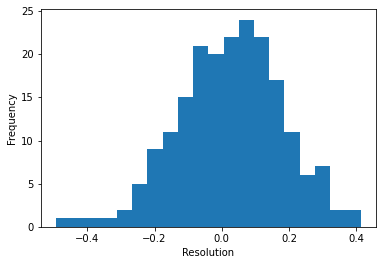

In [8]:
# Plot histogram of these values
print("Histogram of our Resolution for Calibrated Energy")
hist = inputData["Resolution"].plot.hist(bins = 20)
plt.xlabel("Resolution")
plt.show()

Now that we've plotted the 1D histogram, find the standard deviation to determine the resolution:

In [9]:
stdev = inputData["Resolution"].std()
print("Standard Deviation/Resolution of detector: {:.4f}".format(stdev))

Standard Deviation/Resolution of detector: 0.1562


## PART 1 Q3:  Make a 2D histogram showing how your calibrated energy varies with beam energy. Describe what beam energy values used.

So following the exercise, I started at 10000 MeV and iterated 1000 times, up to 109900 MeV.
Now we calculate the Calibration Energy/Resolution for each event and plot as a 2D histogram.

This was done by modifying the run.mac file (which is has been left as) and the GeneratorAction.cpp file (which has also been left modified).

In [10]:
beamChangeData = pd.read_csv('part1_output_files/2d_hist_nt_Energy.csv', comment = '#', \
    names = ["TrueEnergy", "Layer1", "Layer2", "Layer3", "Layer4", "Layer5"])
beamChangeData

TrueEnergy    Layer1    Layer2    Layer3     Layer4    Layer5
0         10000   910.286   2871.81   1562.94    417.832   122.421
1         10100   931.029   3070.77   1495.58    682.006   181.254
2         10200   871.823   2672.09   1580.92    771.214   237.057
3         10300   441.953   3324.20   1442.33    635.015   280.862
4         10400   970.666   2430.45   2127.18    629.487   191.772
..          ...       ...       ...       ...        ...       ...
995      109500  2203.190  14840.50  19376.70  17470.300  9209.870
996      109600  6174.950  20475.00  21926.40  11880.400  4611.570
997      109700  3127.470  16283.40  22178.80  14081.900  7244.930
998      109800  2716.010  16751.60  23078.70  14932.300  6879.830
999      109900  4223.050  18255.60  23911.00  14022.600  4982.350

[1000 rows x 6 columns]

In [11]:
# Calculate sum of the layers
beamChangeData["sum"] = beamChangeData.drop("TrueEnergy", axis=1).sum(axis=1)
beamChangeData

TrueEnergy    Layer1    Layer2    Layer3     Layer4    Layer5        sum
0         10000   910.286   2871.81   1562.94    417.832   122.421   5885.289
1         10100   931.029   3070.77   1495.58    682.006   181.254   6360.639
2         10200   871.823   2672.09   1580.92    771.214   237.057   6133.104
3         10300   441.953   3324.20   1442.33    635.015   280.862   6124.360
4         10400   970.666   2430.45   2127.18    629.487   191.772   6349.555
..          ...       ...       ...       ...        ...       ...        ...
995      109500  2203.190  14840.50  19376.70  17470.300  9209.870  63100.560
996      109600  6174.950  20475.00  21926.40  11880.400  4611.570  65068.320
997      109700  3127.470  16283.40  22178.80  14081.900  7244.930  62916.500
998      109800  2716.010  16751.60  23078.70  14932.300  6879.830  64358.440
999      109900  4223.050  18255.60  23911.00  14022.600  4982.350  65394.600

[1000 rows x 7 columns]

In [12]:
# Now calculate the E_true/E_detected for each row
beamChangeData["Calibration constant"] = beamChangeData["TrueEnergy"]/beamChangeData["sum"]
# Then calculate calibrated energy
beamChangeData["Calibrated Energy"] = beamChangeData["sum"]*beamChangeData["Calibration constant"]
beamChangeData

TrueEnergy    Layer1    Layer2    Layer3     Layer4    Layer5        sum  \
0         10000   910.286   2871.81   1562.94    417.832   122.421   5885.289   
1         10100   931.029   3070.77   1495.58    682.006   181.254   6360.639   
2         10200   871.823   2672.09   1580.92    771.214   237.057   6133.104   
3         10300   441.953   3324.20   1442.33    635.015   280.862   6124.360   
4         10400   970.666   2430.45   2127.18    629.487   191.772   6349.555   
..          ...       ...       ...       ...        ...       ...        ...   
995      109500  2203.190  14840.50  19376.70  17470.300  9209.870  63100.560   
996      109600  6174.950  20475.00  21926.40  11880.400  4611.570  65068.320   
997      109700  3127.470  16283.40  22178.80  14081.900  7244.930  62916.500   
998      109800  2716.010  16751.60  23078.70  14932.300  6879.830  64358.440   
999      109900  4223.050  18255.60  23911.00  14022.600  4982.350  65394.600   

     Calibration constant  Calibrated Energy  
0                1.699152            10000.0  
1                1.587891            10100.0  
2                1.663106            10200.0  
3                1.681808            10300.0  
4                1.637910            10400.0  
..                    ...                ...  
995              1.735325           109500.0  
996              1.684383           109600.0  
997              1.743581           109700.0  
998              1.706070           109800.0  
999              1.680567           109900.0  

[1000 rows x 9 columns]

In [13]:
# Calculate calibration average
new_cal_av = beamChangeData["Calibration constant"].mean()
print(new_cal_av)

# Multiply each rows(runs) total energy by this calibration constant to give E_calibration
beamChangeData["Calibration Energy"] = beamChangeData["sum"]*cal_av
beamChangeData

1.6972620978014716


TrueEnergy    Layer1    Layer2    Layer3     Layer4    Layer5        sum  \
0         10000   910.286   2871.81   1562.94    417.832   122.421   5885.289   
1         10100   931.029   3070.77   1495.58    682.006   181.254   6360.639   
2         10200   871.823   2672.09   1580.92    771.214   237.057   6133.104   
3         10300   441.953   3324.20   1442.33    635.015   280.862   6124.360   
4         10400   970.666   2430.45   2127.18    629.487   191.772   6349.555   
..          ...       ...       ...       ...        ...       ...        ...   
995      109500  2203.190  14840.50  19376.70  17470.300  9209.870  63100.560   
996      109600  6174.950  20475.00  21926.40  11880.400  4611.570  65068.320   
997      109700  3127.470  16283.40  22178.80  14081.900  7244.930  62916.500   
998      109800  2716.010  16751.60  23078.70  14932.300  6879.830  64358.440   
999      109900  4223.050  18255.60  23911.00  14022.600  4982.350  65394.600   

     Calibration constant  Calibrated Energy  Calibration Energy  
0                1.699152            10000.0        10191.918601  
1                1.587891            10100.0        11015.111567  
2                1.663106            10200.0        10621.075149  
3                1.681808            10300.0        10605.932624  
4                1.637910            10400.0        10995.916720  
..                    ...                ...                 ...  
995              1.735325           109500.0       109275.138608  
996              1.684383           109600.0       112682.830184  
997              1.743581           109700.0       108956.390534  
998              1.706070           109800.0       111453.487126  
999              1.680567           109900.0       113247.869420  

[1000 rows x 10 columns]

In [14]:
# Calculate the resolution for said calibration energies, and plot 2D histogram
beamChangeData["resolution"] = (beamChangeData["Calibration Energy"] - beamChangeData["TrueEnergy"])/beamChangeData["TrueEnergy"]
beamChangeData

TrueEnergy    Layer1    Layer2    Layer3     Layer4    Layer5        sum  \
0         10000   910.286   2871.81   1562.94    417.832   122.421   5885.289   
1         10100   931.029   3070.77   1495.58    682.006   181.254   6360.639   
2         10200   871.823   2672.09   1580.92    771.214   237.057   6133.104   
3         10300   441.953   3324.20   1442.33    635.015   280.862   6124.360   
4         10400   970.666   2430.45   2127.18    629.487   191.772   6349.555   
..          ...       ...       ...       ...        ...       ...        ...   
995      109500  2203.190  14840.50  19376.70  17470.300  9209.870  63100.560   
996      109600  6174.950  20475.00  21926.40  11880.400  4611.570  65068.320   
997      109700  3127.470  16283.40  22178.80  14081.900  7244.930  62916.500   
998      109800  2716.010  16751.60  23078.70  14932.300  6879.830  64358.440   
999      109900  4223.050  18255.60  23911.00  14022.600  4982.350  65394.600   

     Calibration constant  Calibrated Energy  Calibration Energy  resolution  
0                1.699152            10000.0        10191.918601    0.019192  
1                1.587891            10100.0        11015.111567    0.090605  
2                1.663106            10200.0        10621.075149    0.041282  
3                1.681808            10300.0        10605.932624    0.029702  
4                1.637910            10400.0        10995.916720    0.057300  
..                    ...                ...                 ...         ...  
995              1.735325           109500.0       109275.138608   -0.002054  
996              1.684383           109600.0       112682.830184    0.028128  
997              1.743581           109700.0       108956.390534   -0.006779  
998              1.706070           109800.0       111453.487126    0.015059  
999              1.680567           109900.0       113247.869420    0.030463  

[1000 rows x 11 columns]

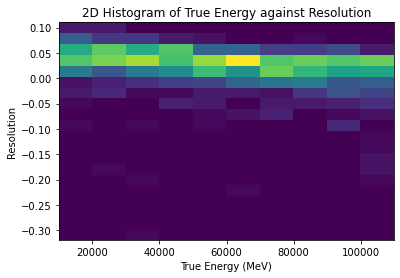

In [15]:
# plot 2d histogram
plt.hist2d( x = beamChangeData["TrueEnergy"], y = beamChangeData["resolution"], bins=(10,20) )
plt.xlabel("True Energy (MeV)")
plt.ylabel("Resolution")
plt.title("2D Histogram of True Energy against Resolution")
plt.show()

Resolution is still centred around 0, as expected. We have some outlier values that pull the graph down, so it appears to be skewed towards negative resolutions.

## PART 2 Q1: Count the number of positrons produced by photon conversion in an event

So I modified the EventAction.cpp file and its header to print positron conversion from photons for a singular beam, as shown here (terminal prints the result of the beam being run once). These files are saved within GeantExample2Part2 if you want to rerun this.

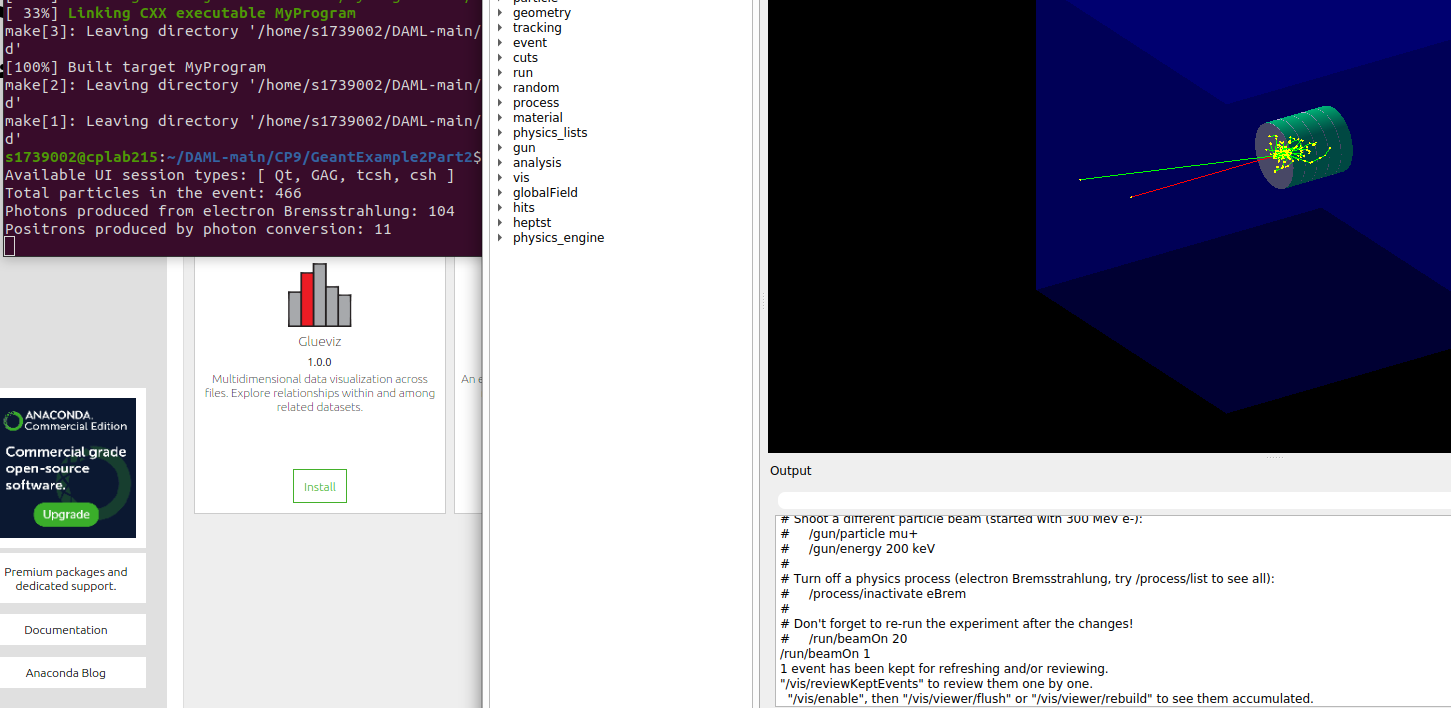

In [16]:
Image("part2_output_files/positron conversion.png")

## PART2 Q2: Calculate the fraction of the total *detected* energy in an event that was deposited by electrons.

To solve this, the cpp files were modified slightly.

In *RunAction.cpp*, A new set of tuple columns was added called "Electron Layer". This holds the electron energy per layer and is determined in *EnergyCounter.cpp*. In this .cpp file, you calculate the energy produced by electrons in each detection separately and then save them to the correct columns in our NTuple.

Then it was run for one event and this data was handed over as a .csv file to be modified in python. This file was renamed and moved for ease of use here, but can be recreated with the current code:

In [17]:
# Open energy fraction csv file
fracData = pd.read_csv('part2_output_files/energy_fraction_nt_Energy.csv', comment = '#', \
    names = ["TrueEnergy", "Layer1", "Layer2", "Layer3", "Layer4", "Layer5", "Electron Layer 1", "Electron Layer 2", "Electron Layer 3", "Electron Layer 4", "Electron Layer 5"])
fracData

TrueEnergy   Layer1   Layer2   Layer3    Layer4  Layer5  Electron Layer 1  \
0         300  159.233  9.07324  2.86212  0.102833       0           96.6933   

   Electron Layer 2  Electron Layer 3  Electron Layer 4  Electron Layer 5  
0           9.06053           2.85895          0.102833                 0

In [18]:
# Now calculate the sums of each layer (total and electron) then divide to get fraction
# I know this isn't the nicest looking way to do this, but its the quickest :)
fracData[["Layer1","Layer2","Layer3","Layer4","Layer5"]]
energy_sum = fracData[["Layer1","Layer2","Layer3","Layer4","Layer5"]].sum(axis=1)
detected_sum = fracData[["Electron Layer 1","Electron Layer 2","Electron Layer 3","Electron Layer 4","Electron Layer 5",]].sum(axis=1)
#print(energy_sum[0], detected_sum[0])
frac = detected_sum[0]/energy_sum[0]
print("Fraction of electron deposited energy against detected energy: {:.4f}".format(frac))

Fraction of electron deposited energy against detected energy: 0.6348
